In [1]:
import yfinance as yf
import pandas as pd

def fetch_data(ticker="AAPL", period="1y"):
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    df.to_csv(f"data/{ticker}_history.csv")
    return df

# Fetch data
data = fetch_data()

In [21]:
import numpy as np
# Here we cut the long sequnce of the data in N sumber of sequences of length seq_length 
# and the targest are N sequences of predict_length which come right behind the sequence
# we can put any column of the df as target column wiht  the same sting name 

# Function to cre
def create_sequences(df, seq_length, predict_length, target_column):
    sequences = []
    targets = []
   
    target_idx = df.columns.get_loc(target_column)
    print(target_idx)
    for i in range(len(data) - seq_length - predict_length + 1):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length:i + seq_length + predict_length, target_idx]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)


In [23]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
# Load data
df = pd.read_csv('data/AAPL_history.csv', index_col='Date', parse_dates=True)

df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
# using the 4 columns ['Open','High','Low','Volume'] as input 
# using the cloumn ['Close'] as output 
# normalizing the input and output 
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
#print(df.head())
# Convert to numpy array


#Create sequences
# Parameters
seq_length = 30
predict_length = 3  # Number of days to predict
target_column = 'Close'

sequences, targets = create_sequences(df, seq_length, predict_length, target_column)

print(sequences.shape)
print(targets.shape)
# Split into training and testing sets
train_size = int(len(sequences) * 0.8)
train_sequences = sequences[:train_size]
train_targets = targets[:train_size]
test_sequences = sequences[train_size:]
test_targets = targets[train_size:]

# Convert to PyTorch tensors
X_train= torch.tensor(train_sequences, dtype=torch.float32)
Y_train = torch.tensor(train_targets, dtype=torch.float32)
X_test= torch.tensor(test_sequences, dtype=torch.float32)
Y_test= torch.tensor(test_targets, dtype=torch.float32)

Y_test.shape

4
(220, 30, 5)
(220, 3)


torch.Size([44, 3])

In [24]:
import torch
import torch.nn as nn
class RNN_price_predictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN_price_predictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 5
hidden_size = 50
num_layers = 2
output_size = 3


In [26]:

import torch.optim as optim
import matplotlib.pyplot as plt
model = RNN_price_predictor(input_size, hidden_size, num_layers, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
model.train()
for epoch in range(num_epochs):
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)
    print(f'Test Loss: {test_loss.item():.4f}')



Epoch [10/100], Loss: 0.0152
Epoch [20/100], Loss: 0.0087
Epoch [30/100], Loss: 0.0047
Epoch [40/100], Loss: 0.0040
Epoch [50/100], Loss: 0.0035
Epoch [60/100], Loss: 0.0034
Epoch [70/100], Loss: 0.0032
Epoch [80/100], Loss: 0.0032
Epoch [90/100], Loss: 0.0031
Epoch [100/100], Loss: 0.0030
Test Loss: 0.0175


In [ ]:
# Inverse transform to get actual prices
test_outputs = model(X_test)
test_outputs.shape

# Plotting the results for the first test sample
#plt.figure(figsize=(12,6))
#plt.plot(range(seq_length, seq_length + predict_length))

: 

In [ ]:
import mlflow
from mlflow.models import infer_signature

: 

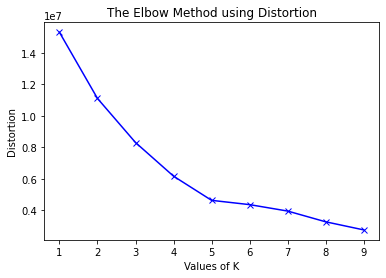

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()